## Variation of origin-test-reader

In [2]:
#!/usr/bin/env python

import sys
import os
import random
import time
import zmq
import json
import numpy as np
import matplotlib.pyplot as plt
import math

# first find ourself
#fullBinPath  = os.path.abspath(os.getcwd() + "/" + sys.argv[0])
#fullBasePath = os.path.dirname(os.path.dirname(fullBinPath))
#fullLibPath  = os.path.join(fullBasePath, "lib")
fullLibPath='E:\Dropbox\Research\GitHub\Origin\lib'
#fullCfgPath  = os.path.join(fullBasePath, "config")
fullCfgPath='E:\Dropbox\Research\GitHub\Origin\config'
sys.path.append(fullLibPath)
print fullLibPath
from origin.client import server, random_data

if len(sys.argv) > 1:
  if sys.argv[1] == 'test':
    configfile = os.path.join(fullCfgPath, "origin-server-test.cfg")
  else:
    configfile = os.path.join(fullCfgPath, sys.argv[1])
else:
  configfile = os.path.join(fullCfgPath, "origin-server.cfg")

import ConfigParser
config = ConfigParser.ConfigParser()
config.read(configfile)

context = zmq.Context()
socket = context.socket(zmq.REQ)
#host = config.get('Server','ip')
host='hexlabmonitor.physics.wisc.edu'

#port = config.getint('Server','read_port')
port=5561
socket.connect("tcp://%s:%s" % (host,port))

stream_test_list = ['Rb_PG_X0','Rb_PG_Y0','Rb_PG_X1','Rb_PG_Y1','Rb_CoilThermistor']

E:\Dropbox\Research\GitHub\Origin\lib


In [21]:
def RtoT(R):
    # Coefficients
    [A,B,C]=[0.001125308852122, 0.000234711863267,0.000000085663516]
    oneoverT=A+B*math.log(R)+C*math.pow(math.log(R),3)
    T=1.0/oneoverT-273.15
    return T

In [4]:
starttime=time.time()-60*60*6
stoptime=time.time()-10 # now
err=[]
data=[]
for stream in stream_test_list:
    print "sending raw read request for stream `{}`....".format(stream)
    request_obj = { 'start':starttime, 'stop':stoptime,'stream': stream, 'raw': True }
    socket.send(json.dumps(request_obj))
    response = socket.recv()
    print "Data received"        
    jsondata=json.loads(response)
    err.append(jsondata[0])
    data.append(jsondata[1])    

sending raw read request for stream `Rb_PG_X0`....
Data received
sending raw read request for stream `Rb_PG_Y0`....
Data received
sending raw read request for stream `Rb_PG_X1`....
Data received
sending raw read request for stream `Rb_PG_Y1`....
Data received
sending raw read request for stream `Rb_CoilThermistor`....
Data received


In [8]:
print 'result'
result={}
for i in range(0,len(stream_test_list)-1):
    for key in data[i]:
        result[key]=data[i][key]
        print key

print 'result2'
result2={}
for i in range(4,len(stream_test_list)):
    for key in data[i]:
        result2[key]=data[i][key]
        print key

result
measurement_time
data_camera_data_15102504_stats_X0
measurement_time
data_camera_data_15102504_stats_Y0
measurement_time
data_camera_data_15102504_stats_X1
measurement_time
data_camera_data_15102504_stats_Y1
result2
measurement_time
thermistor


In [29]:
magnification= 36.0/162.22 # 162 pixels from end-to-end (4 spacing = 36 um?)
cut=-10
save=True
timestamp=np.array(result[u'measurement_time'])[0:cut]/2**32
X0=magnification*np.array(result['data_camera_data_15102504_stats_X0'])[0:len(timestamp)]
X1=magnification*np.array(result['data_camera_data_15102504_stats_X1'])[0:len(timestamp)]
Y0=magnification*np.array(result['data_camera_data_15102504_stats_Y0'])[0:len(timestamp)]
Y1=magnification*np.array(result['data_camera_data_15102504_stats_Y1'])[0:len(timestamp)]


therm_timestamp=np.array(result2['measurement_time'])/2**32
therm_resistance=np.array(result2['thermistor'])
therm_temperature=map(RtoT,therm_resistance)

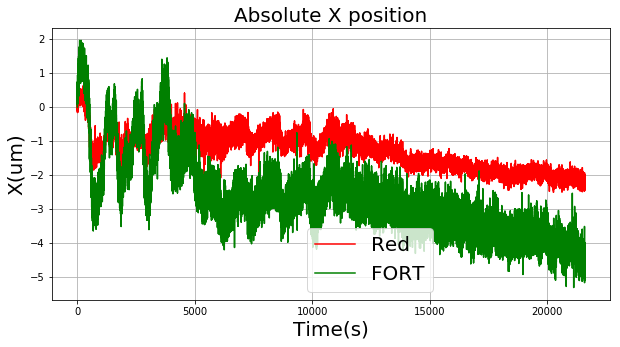

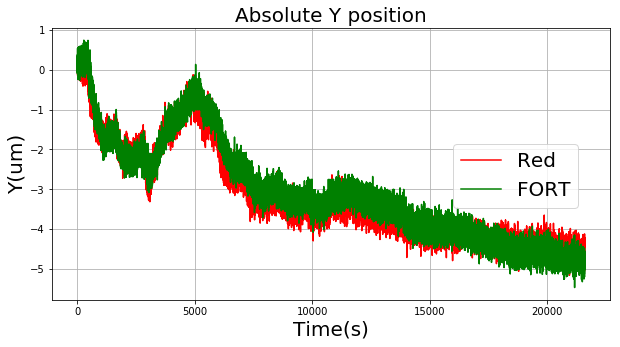

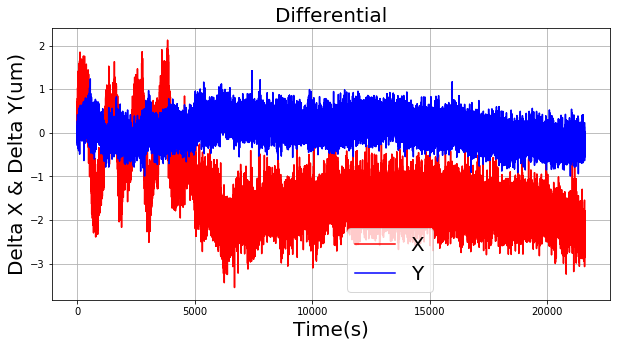

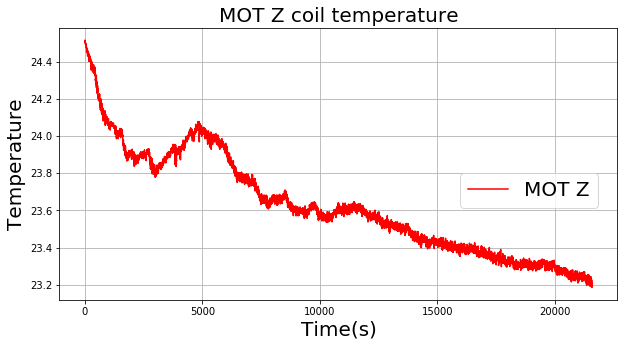

In [31]:
figuresize=(10,5)
fontsize=20
fig=plt.figure(figsize=figuresize)
plt.plot(timestamp-np.min(timestamp),X0-X0[0],color='r',label='Red');
plt.plot(timestamp-np.min(timestamp),X1-X1[0],color='g',label='FORT');
plt.grid()
plt.legend(bbox_to_anchor=(0.7, 0.3),fontsize=fontsize)
plt.ylabel('X(um)',fontsize=fontsize)
plt.xlabel('Time(s)',fontsize=fontsize)
plt.title('Absolute X position',fontsize=fontsize)
if save:
    plt.savefig('AbsX.png')
plt.show()

fig=plt.figure(figsize=figuresize)
plt.plot(timestamp-np.min(timestamp),Y0-Y0[0],color='r',label='Red');
plt.plot(timestamp-np.min(timestamp),Y1-Y1[0],color='g',label='FORT');
plt.grid()
plt.legend(bbox_to_anchor=(0.7, 0.3),fontsize=fontsize)
plt.ylabel('Y(um)',fontsize=fontsize)
plt.xlabel('Time(s)',fontsize=fontsize)
plt.title('Absolute Y position',fontsize=fontsize)
if save:
    plt.savefig('AbsY.png')
plt.show()

fig=plt.figure(figsize=figuresize)
plt.plot(timestamp-np.min(timestamp),X1-X0-(X1[0]-X0[0]),color='red',label='X');
plt.plot(timestamp-np.min(timestamp),Y1-Y0-(Y1[0]-Y0[0]),color='blue',label='Y');
plt.grid()
plt.legend(bbox_to_anchor=(0.7, 0.3),fontsize=fontsize)
plt.ylabel('Delta X & Delta Y(um)',fontsize=fontsize)
plt.xlabel('Time(s)',fontsize=fontsize)
plt.title('Differential',fontsize=fontsize)
if save:
    plt.savefig('deltaXandY.png')
plt.show()

fig=plt.figure(figsize=figuresize)
plt.plot(therm_timestamp-np.min(timestamp),therm_temperature,color='red',label='MOT Z');
plt.grid()
plt.legend(bbox_to_anchor=(0.7, 0.3),fontsize=fontsize)
plt.ylabel('Temperature',fontsize=fontsize)
plt.xlabel('Time(s)',fontsize=fontsize)
plt.title('MOT Z coil temperature',fontsize=fontsize)
if save:
    plt.savefig('CoilTemperature.png')
plt.show()

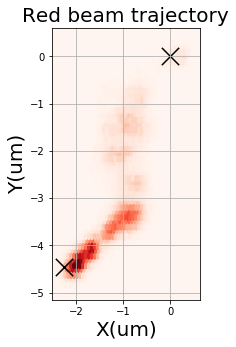

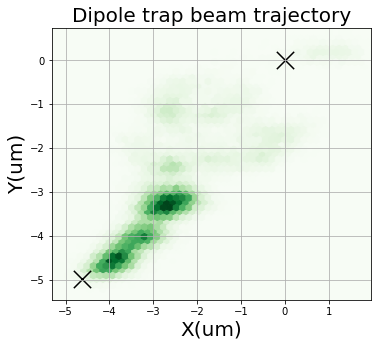

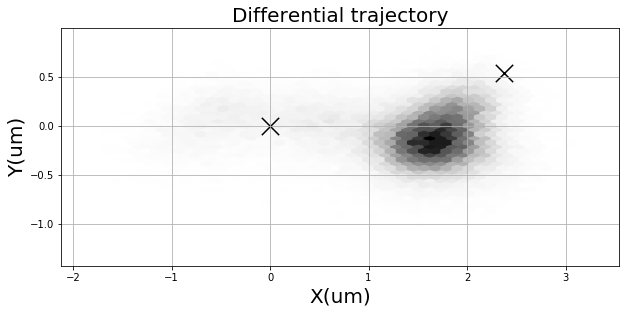

In [32]:
gridsize=50
figuresize=(10,5)
fontsize=20
fig=plt.figure(figsize=figuresize)
plt.hexbin(X0-X0[0],Y0-Y0[0],cmap='Reds',gridsize=gridsize)
plt.scatter(0,0,marker='x',s=300,color='black')
plt.scatter(X0[-1]-X0[0],Y0[-1]-Y0[0],marker='x',s=300,color='black')
plt.ylabel('Y(um)',fontsize=fontsize)
plt.xlabel('X(um)',fontsize=fontsize)
plt.title('Red beam trajectory',fontsize=fontsize)
plt.grid()
plt.axes().set_aspect('equal')
if save:
    plt.savefig("red.pdf")
    plt.savefig("red.png")
plt.show()

fig=plt.figure(figsize=figuresize)
plt.hexbin(X1-X1[0],Y1-Y1[0],cmap='Greens',gridsize=gridsize)
plt.scatter(0,0,marker='x',s=300,color='black')
plt.scatter(X1[-1]-X1[0],Y1[-1]-Y1[0],marker='x',s=300,color='black')
plt.ylabel('Y(um)',fontsize=fontsize)
plt.xlabel('X(um)',fontsize=fontsize)
plt.title('Dipole trap beam trajectory',fontsize=fontsize)
plt.grid()
plt.axes().set_aspect('equal')
if save:
    plt.savefig("dipole.pdf")
    plt.savefig("dipole.png")
plt.show()

fig=plt.figure(figsize=figuresize)
plt.hexbin(X0-X1-(X0[0]-X1[0]),Y0-Y1-(Y0[0]-Y1[0]),cmap='Greys',gridsize=gridsize)
plt.scatter(0,0,marker='x',s=300,color='black')
plt.scatter(X0[-1]-X1[-1]-(X0[0]-X1[0]),Y0[-1]-Y1[-1]-(Y0[0]-Y1[0]),marker='x',s=300,color='black')
plt.axes().set_aspect('equal')
plt.ylabel('Y(um)',fontsize=fontsize)
plt.xlabel('X(um)',fontsize=fontsize)
plt.title('Differential trajectory',fontsize=fontsize)
plt.grid()
if save:
    plt.savefig("differential.pdf")
    plt.savefig("differential.png")
plt.show()